# Dataset

**Canadian house prices for top cities**

A dataset comprising the price, address, number of bathrooms, number of bedrooms, city, and province of real estate listings for Canada's top 45 most populous cities, according to the 2021 census. [here](https://www.kaggle.com/datasets/jeremylarcher/canadian-house-prices-for-top-cities?resource=download).

Variables

- City: City or major metropolitan area within which listings were found. For example, Toronto may include listings from surrounding suburbs such as Markham, Oakville, etc.
- Price: Listed price for the property in Canadian dollars.
- Address: Street address and, where applicable, unit number for the listing.
- Number_Beds: Number of bedrooms mentioned in the listing.
- Number_Baths: Number of bathrooms mentioned in the listing.
- Province: Province in which each city resides. Note, border towns such as Ottawa do not include listings from the surrounding out-of-province cities like Gatineau.
- Population: City population. According to simplemaps (https://simplemaps.com/data/canada-cities)
- Longitude / Latitude: Longitude and Latitude data for individual cities, taken from simpelmaps (https://simplemaps.com/data/canada-cities)
- Median_Family_Income: Median household income for the city taken from the 2021 Canadian census.


In [ ]:
# https://drive.google.com/file/d/1fLr9faEt1mMoNcZcXMKppZStGZnJ6GYf/view?usp=drive_link

file_id = '1fLr9faEt1mMoNcZcXMKppZStGZnJ6GYf'
url = f'https://drive.google.com/uc?id={file_id}'

In [ ]:
%matplotlib inline

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [ ]:
df = pd.read_csv(url, encoding='ISO-8859-1') # this encoding is for the French character's in Montreal
df.head()

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0


In [ ]:
df.isnull().sum() # check colums for empty values

,0
City,0
Price,0
Address,0
Number_Beds,0
Number_Baths,0
Province,0
Population,0
Latitude,0
Longitude,0
Median_Family_Income,0


In [ ]:
df[df.isnull().any(axis=1)] # check rows for empty values

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income


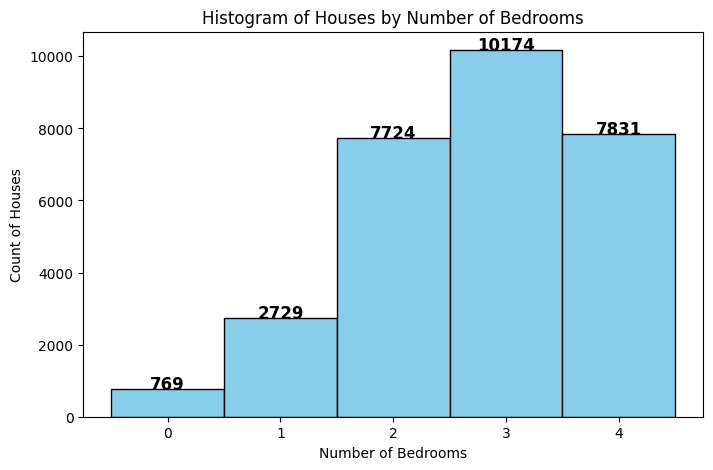

In [ ]:
# Count number of houses per bedroom category
filtered_data = df[df['Number_Beds'].isin([0, 1, 2, 3, 4])]

# Create histogram
plt.figure(figsize=(8,5))
counts, bins, patches = plt.hist(filtered_data['Number_Beds'], bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5], color='skyblue', edgecolor='black', align='mid')

# Add labels to bars
for count, bin in zip(counts, bins[:-1]):  # Iterate over count values and bin positions
    plt.text(bin + 0.5, count + 2, str(int(count)), ha='center', fontsize=12, fontweight='bold')

# Labels and title
plt.xlabel("Number of Bedrooms")
plt.ylabel("Count of Houses")
plt.title("Histogram of Houses by Number of Bedrooms")

# Show plot
plt.show()


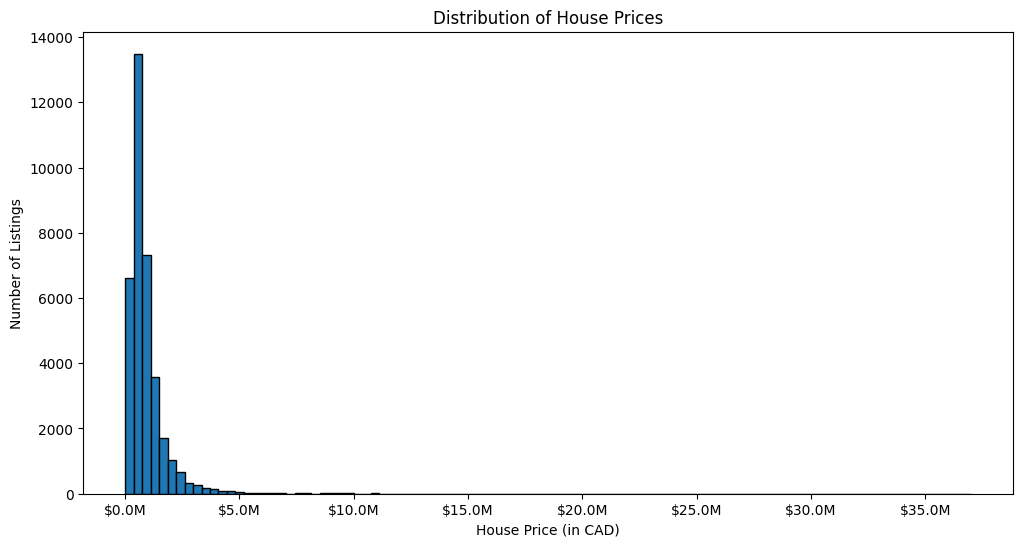

In [ ]:
# How house prices are distributed

plt.figure(figsize=(12, 6))
plt.hist(df['Price'], bins=100, edgecolor='black')

plt.title('Distribution of House Prices')
plt.xlabel('House Price (in CAD)')
plt.ylabel('Number of Listings')


# Format X-axis as $M
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x/1_000_000:.1f}M'))


plt.show()

# Prices are skewed right — meaning many listings are on the lower end, with a few very high-priced ones - outliers (super expensive homes).

In [ ]:
# to check for the top prices
top_prices = df[['City', 'Price', 'Address', 'Number_Beds', 'Number_Baths']]
top_prices.sort_values(by='Price', ascending=False).head(10)

,City,Price,Address,Number_Beds,Number_Baths
18608,Barrie,37000000.0,1775 RIDGE RD W,8,11
25546,White Rock,28800000.0,17499 20 AVENUE,4,3
26497,White Rock,27999999.0,2165 123 STREET,5,7
1818,Vancouver,23800000.0,1123 CRESTLINE ROAD,6,9
32097,Burnaby,19880000.0,1351 LAURIER AVENUE,7,9
1754,Vancouver,19880000.0,1351 LAURIER AVENUE,7,9
1704,Vancouver,18950000.0,166 28TH STREET,6,8
25423,White Rock,18700000.0,2308 128 STREET,5,4
25976,White Rock,17999000.0,2213 176 STREET,3,1
26478,White Rock,17890000.0,20661 24 AVENUE,2,1


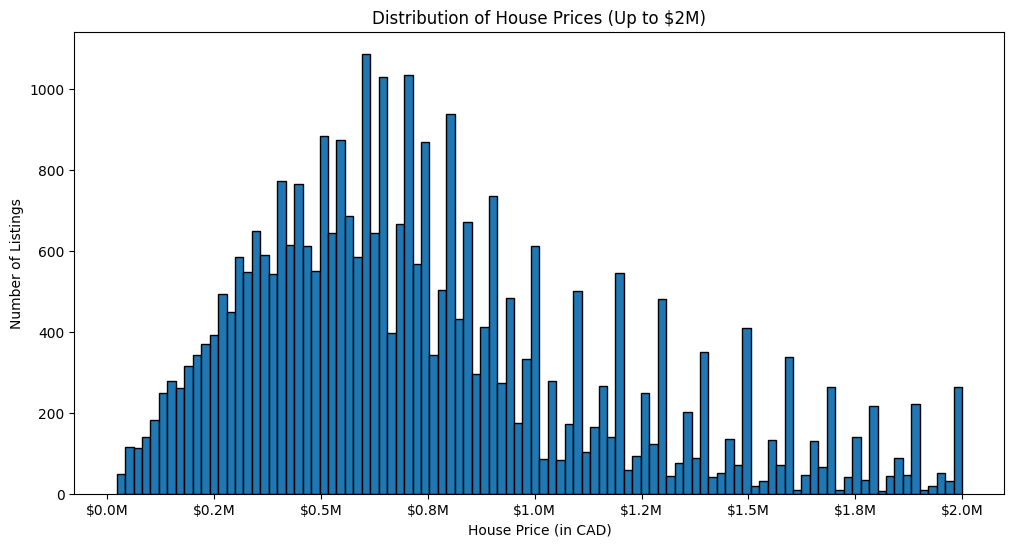

In [ ]:
# Distribution of House Prices (Up to $2M)
price_filtered_2m  = df[df['Price'] <= 2000000]['Price']

plt.figure(figsize=(12, 6))
plt.hist(price_filtered_2m, bins=100, edgecolor='black')

plt.title('Distribution of House Prices (Up to $2M)')
plt.xlabel('House Price (in CAD)')
plt.ylabel('Number of Listings')


# Format X-axis as $M
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x/1_000_000:.1f}M'))

plt.show()

In [ ]:
!pip install pywaffle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 15.6 MB/s eta 0:00:00


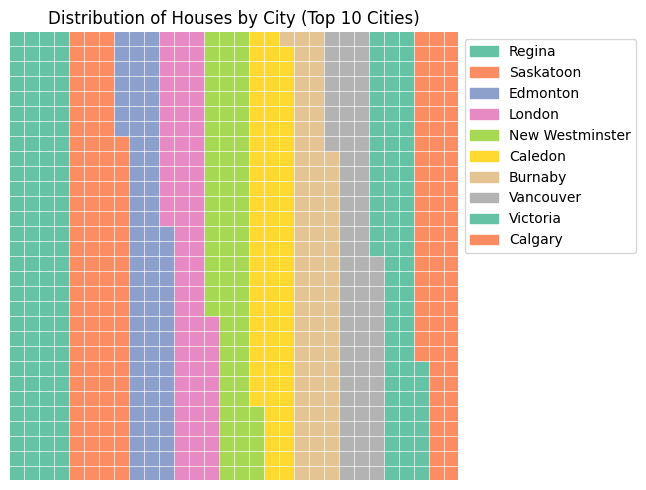

In [ ]:
# Waffle charts

from pywaffle import Waffle
# Distribution of houses by city
city_counts = df['City'].value_counts().head(10)

# Create the waffle chart
fig = plt.figure(
    FigureClass=Waffle,
    rows=30,
    columns=30,
    values=city_counts.values,
    labels=list(city_counts.index),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    figsize=(9, 5)
)
plt.title("Distribution of Houses by City (Top 10 Cities)")
plt.show()

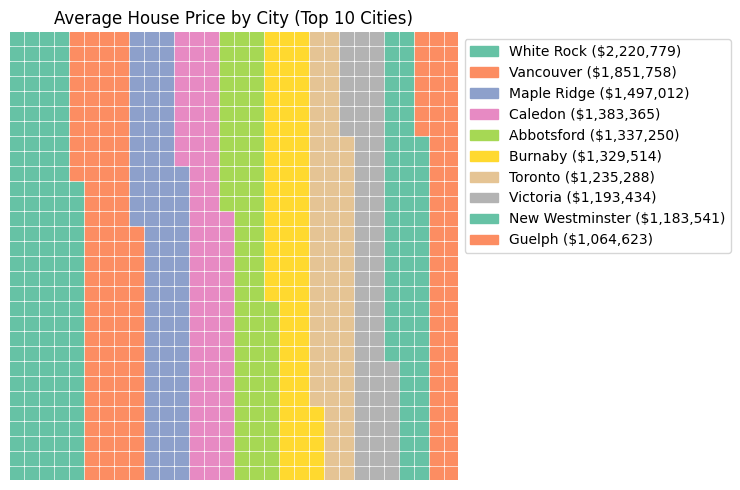

In [ ]:
# Calculate average price per city
avg_price_by_city = df.groupby('City')['Price'].mean().sort_values(ascending=False).head(10)

# Normalize values to fit in a waffle chart (e.g., divide by 10,000 or 100,000 depending on the price scale)
normalized_values = (avg_price_by_city / 10000).astype(int)

# Create the waffle chart
fig = plt.figure(
    FigureClass=Waffle,
    rows=30,
    columns=30,
    values=normalized_values.values,
    labels=[f"{city} (${int(price):,})" for city, price in avg_price_by_city.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    figsize=(9, 5)
)
plt.title("Average House Price by City (Top 10 Cities)")
plt.tight_layout()
plt.show()

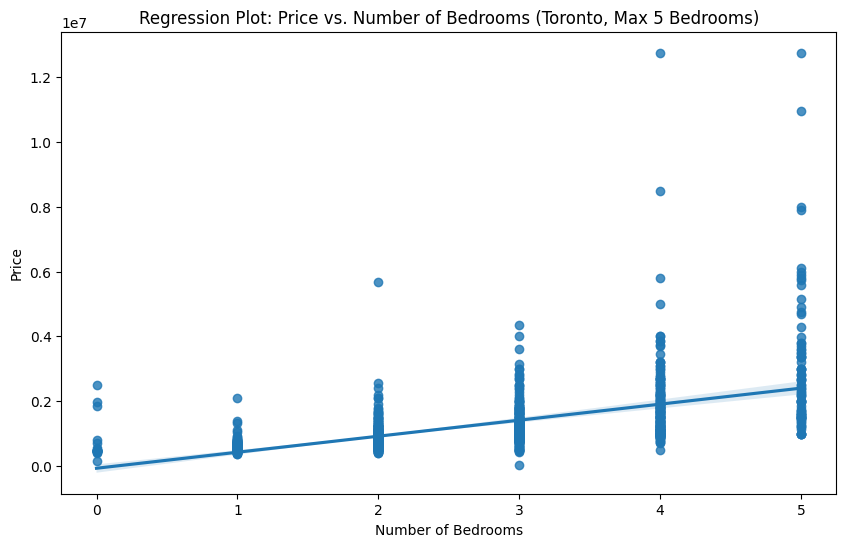

In [ ]:
# regression plot
df_filtered = df[(df['City'] == 'Toronto') & (df['Number_Beds'] <= 5)]
plt.figure(figsize=(10, 6))
sns.regplot(x='Number_Beds', y='Price', data=df_filtered)
plt.title('Regression Plot: Price vs. Number of Bedrooms (Toronto, Max 5 Bedrooms)')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

In [ ]:
!pip install dash pandas plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 16.1 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [ ]:
#Basic Dashboard
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Dash app
app = dash.Dash(__name__)

# App layout
app.layout = html.Div(children=[
    html.H1('Housing Data'),

    # Dropdown for selecting city
    dcc.Dropdown(
        id='city-dropdown',
        options=[{'label': city, 'value': city} for city in df['City'].unique()],
        value=df['City'].unique()[0],  # default value
        style={'width': '50%'}
    ),

    # Graph for price distribution by city
    dcc.Graph(
        id='price-histogram'
    ),

    # Graph for price vs beds
    dcc.Graph(
        id='price_beds_histogram'
    ),

    # Interactive map
    dcc.Graph(
        id='city-map'
    ),
])

# Define the callback to update the graphs
@app.callback(
    [Output('price-histogram', 'figure'),
     Output('price_beds_histogram', 'figure'),
     Output('city-map', 'figure')],
    [Input('city-dropdown', 'value')]
)
def update_graphs(selected_city):
    # Filter data based on the selected city
    filtered_df = df[df['City'] == selected_city]

    # Create the plots with filtered data

    # Price distribution (histogram) in the selected city
    price_histogram = px.histogram(filtered_df, x='Price', nbins=30,
                                    title=f'Price Distribution in {selected_city}')

    # Price vs Number of Beds (scatter plot)
    price_beds_histogram = px.histogram(filtered_df, x='Number_Beds', y='Price', histfunc='avg', color='City', title=f'Average Price by Number of Bedrooms in {selected_city}')


    # Map of cities, colored by Median Family Income
    map_fig = px.scatter_geo(filtered_df, lat='Latitude', lon='Longitude', color='Median_Family_Income',
                             hover_name='City', size='Price', title=f'{selected_city} Map with Median Family Income')

    return price_histogram, price_beds_histogram, map_fig

if __name__ == '__main__':
    app.run(debug=True)


<IPython.core.display.Javascript object>